<h2 style="align:center">DL : Gradient Descent,Mini Batch,SGD Implementation Python</h2>

For employee's bonus dataset, implement gradient descent in PyTorch to find optimal values of weights that decides the bonus amount.

𝑏𝑜𝑛𝑢𝑠 = 𝜔_1∗𝑝𝑒𝑟𝑓𝑜𝑟𝑚𝑎𝑛𝑐𝑒+𝜔_2∗𝑒𝑥𝑝𝑒𝑟𝑖𝑒𝑛𝑐𝑒+𝜔_3∗𝑝𝑟𝑜𝑗𝑒𝑐𝑡𝑠_𝑐𝑜𝑚𝑝𝑙𝑒𝑡𝑒𝑑+ 𝑏

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

# Step 1: Read the dataset from the CSV file
df = pd.read_csv('bonus_dataset.csv')
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [10]:
df.shape


(100, 5)

In [11]:
import torch

# Extract features and target from the DataFrame
performance = torch.tensor(df['performance'].values, dtype=torch.float32)
years_of_experience = torch.tensor(df['years_of_experience'].values, dtype=torch.float32)
projects_completed = torch.tensor(df['projects_completed'].values, dtype=torch.float32)
bonus = torch.tensor(df['bonus'].values, dtype=torch.float32)

Batch Gradient Descent 

In [12]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

w1, w2

(tensor([0.8457], requires_grad=True), tensor([0.8041], requires_grad=True))

In [13]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Learning rate and number of iterations
learning_rate = 0.006
epochs = 5000

# Lists to store the loss at each epoch
loss_history = []

# Step 3: Training loop for gradient descent
for epoch in range(epochs):
    # Compute the predicted bonus using the current weights and bias
    predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
    
    # Compute the Mean Squared Error (MSE) loss
    loss = ((predicted_bonus - bonus) ** 2).mean()

    loss_history.append(loss.item())
    
    # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
    loss.backward()
    
    # Update the weights and bias using the computed gradients
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    # Zero the gradients after updating
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 18.1717
Epoch [200/5000], Loss: 15.8566
Epoch [300/5000], Loss: 13.8380
Epoch [400/5000], Loss: 12.0768
Epoch [500/5000], Loss: 10.5399
Epoch [600/5000], Loss: 9.1986
Epoch [700/5000], Loss: 8.0281
Epoch [800/5000], Loss: 7.0064
Epoch [900/5000], Loss: 6.1148
Epoch [1000/5000], Loss: 5.3367
Epoch [1100/5000], Loss: 4.6576
Epoch [1200/5000], Loss: 4.0649
Epoch [1300/5000], Loss: 3.5476
Epoch [1400/5000], Loss: 3.0961
Epoch [1500/5000], Loss: 2.7021
Epoch [1600/5000], Loss: 2.3583
Epoch [1700/5000], Loss: 2.0582
Epoch [1800/5000], Loss: 1.7963
Epoch [1900/5000], Loss: 1.5677
Epoch [2000/5000], Loss: 1.3682
Epoch [2100/5000], Loss: 1.1941
Epoch [2200/5000], Loss: 1.0421
Epoch [2300/5000], Loss: 0.9095
Epoch [2400/5000], Loss: 0.7938
Epoch [2500/5000], Loss: 0.6928
Epoch [2600/5000], Loss: 0.6046
Epoch [2700/5000], Loss: 0.5277
Epoch [2800/5000], Loss: 0.4605
Epoch [2900/5000], Loss: 0.4019
Epoch [3000/5000], Loss: 0.3508
Epoch [3100/5000], Loss: 0.3061
Epoch [3200/

In [14]:
# Step 4: Print the learned weights and bias
print(f"\nLearned weights and bias:")
print(f"w1: {w1.item():.2f}, w2: {w2.item():.2f}, w3: {w3.item():.2f}, bias: {bias.item():.2f}")


Learned weights and bias:
w1: 12.03, w2: 5.91, w3: 2.13, bias: 19.38


In [15]:
# predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
predicted_bonus = w1 * 7 + w2 * 4 + w3 * 7 + bias
predicted_bonus

tensor([142.0819], grad_fn=<AddBackward0>)

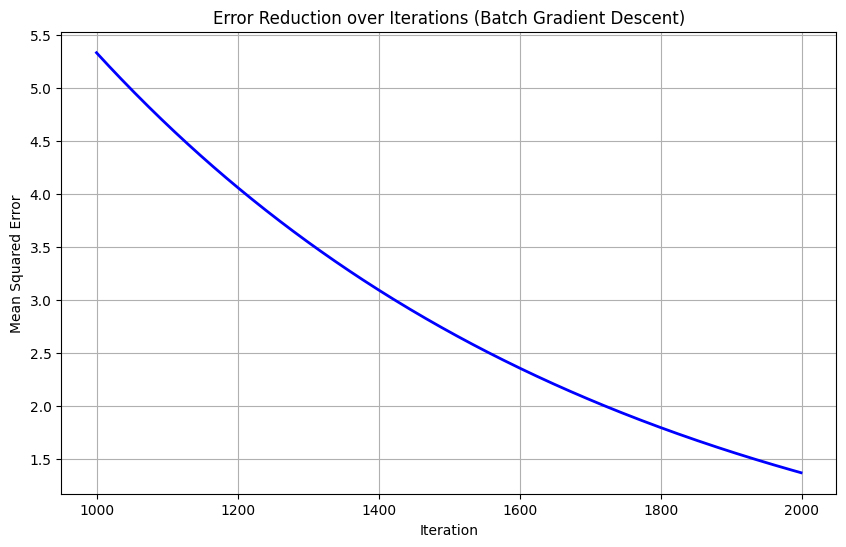

In [16]:
def plot_loss(epochs, loss_history, title):
    # Plotting the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

plot_loss(range(1000, 2000), loss_history[1000:2000], "Error Reduction over Iterations (Batch Gradient Descent)")

Mini Batch

In [17]:
# Initialize weights and bias randomly
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Parameters for Mini-Batch Gradient Descent
learning_rate = 0.001
epochs = 5000
batch_size = 16  # Define the batch size

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for mini-batch gradient descent
for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Select the mini-batch
        batch_performance = performance[i:i + batch_size]
        batch_years_of_experience = years_of_experience[i:i + batch_size]
        batch_projects_completed = projects_completed[i:i + batch_size]
        batch_bonus = bonus[i:i + batch_size]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss
        loss = ((predicted_bonus - batch_bonus) ** 2).mean()
        loss_history.append(loss.item())

         
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/5000], Loss: 12.7011
Epoch [200/5000], Loss: 10.4960
Epoch [300/5000], Loss: 8.8223
Epoch [400/5000], Loss: 7.4828
Epoch [500/5000], Loss: 6.3771
Epoch [600/5000], Loss: 5.4485
Epoch [700/5000], Loss: 4.6614
Epoch [800/5000], Loss: 3.9908
Epoch [900/5000], Loss: 3.4179
Epoch [1000/5000], Loss: 2.9279
Epoch [1100/5000], Loss: 2.5083
Epoch [1200/5000], Loss: 2.1491
Epoch [1300/5000], Loss: 1.8413
Epoch [1400/5000], Loss: 1.5776
Epoch [1500/5000], Loss: 1.3517
Epoch [1600/5000], Loss: 1.1582
Epoch [1700/5000], Loss: 0.9923
Epoch [1800/5000], Loss: 0.8502
Epoch [1900/5000], Loss: 0.7285
Epoch [2000/5000], Loss: 0.6242
Epoch [2100/5000], Loss: 0.5348
Epoch [2200/5000], Loss: 0.4582
Epoch [2300/5000], Loss: 0.3926
Epoch [2400/5000], Loss: 0.3364
Epoch [2500/5000], Loss: 0.2882
Epoch [2600/5000], Loss: 0.2470
Epoch [2700/5000], Loss: 0.2116
Epoch [2800/5000], Loss: 0.1813
Epoch [2900/5000], Loss: 0.1553
Epoch [3000/5000], Loss: 0.1331
Epoch [3100/5000], Loss: 0.1140
Epoch [3200/500

In [18]:
len(loss_history)

35000

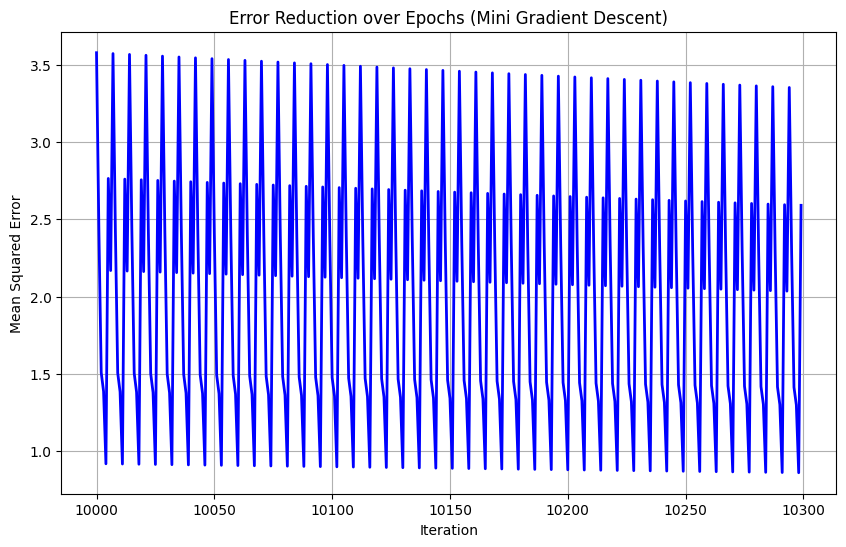

In [19]:
plot_loss(range(10000,10300), loss_history[10000:10300], "Error Reduction over Epochs (Mini Gradient Descent)")

Stochastic Gradient Descent

In [20]:
# Initialize weights and bias randomly
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

# Parameters for Stochastic Gradient Descent
learning_rate = 0.001
epochs = 500

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for stochastic gradient descent
for epoch in range(epochs):
    for i in range(n_samples):
        # Select a single data point
        single_performance = performance[i]
        single_years_of_experience = years_of_experience[i]
        single_projects_completed = projects_completed[i]
        single_bonus = bonus[i]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss for this data point
        loss = (predicted_bonus - single_bonus) ** 2
        
        if i%10==0:
            loss_history.append(loss.item())
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 0.6296
Epoch [200/500], Loss: 0.0557
Epoch [300/500], Loss: 0.0049
Epoch [400/500], Loss: 0.0004
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0021, w2 = 5.9935, w3 = 2.0084
Learned bias: 19.9591


In [21]:
len(loss_history)

5000

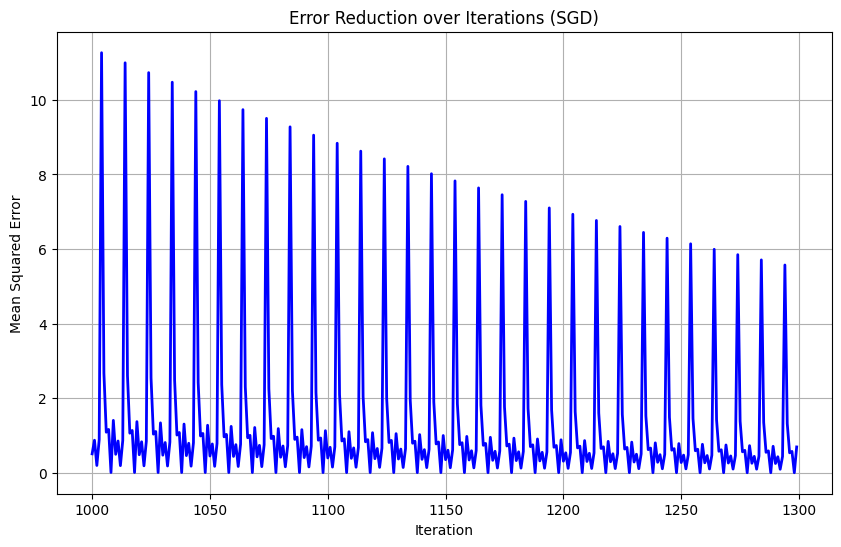

In [22]:
plot_loss(range(1000,1300), loss_history[1000:1300], "Error Reduction over Iterations (SGD)")